In [2]:
#Daniel Diamont - dd28977
#Jerry Yang - jhy395
#Zhaofeng Liang - zl4685

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import sklearn as sk
% matplotlib inline

Correlation between column 0 and column 1 is: -0.00399789751734
Correlation between column 0 and column 2 is: 0.990066417094
Correlation between column 0 and column 3 is: 0.00411103371126
Correlation between column 1 and column 2 is: -0.00408455194468
Correlation between column 1 and column 3 is: -0.990234776337
Correlation between column 2 and column 3 is: 0.00406734448741


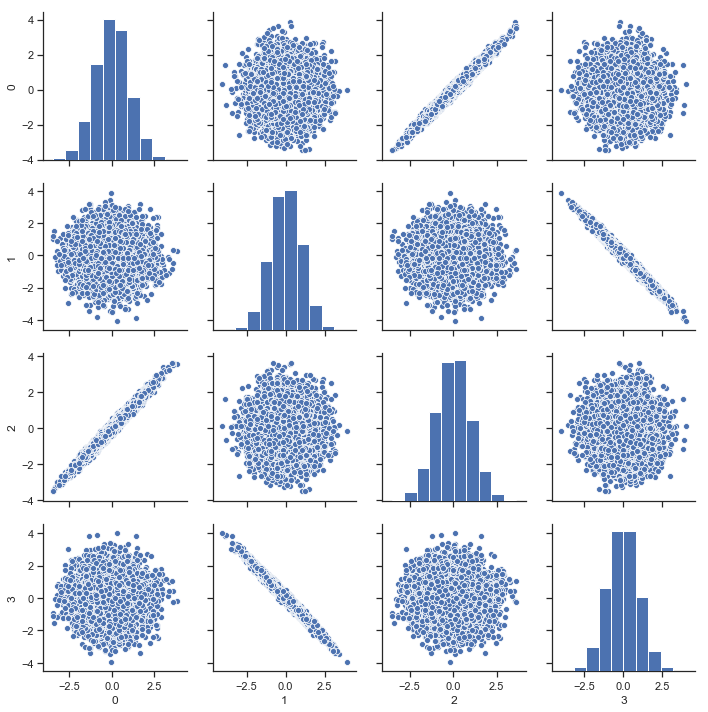

In [4]:
#1. Part a:

df1 = pd.read_csv("DF1",index_col='Unnamed: 0')
print("Correlation between column 0 and column 1 is: %s" %df1['0'].corr(df1['1']))
print("Correlation between column 0 and column 2 is: %s" %df1['0'].corr(df1['2']))
print("Correlation between column 0 and column 3 is: %s" %df1['0'].corr(df1['3']))
print("Correlation between column 1 and column 2 is: %s" %df1['1'].corr(df1['2']))
print("Correlation between column 1 and column 3 is: %s" %df1['1'].corr(df1['3']))
print("Correlation between column 2 and column 3 is: %s" %df1['2'].corr(df1['3']))
g = sns.pairplot(df1)


Answer to #1 Part a: Based on the number and the graphs, column 0 and column 2 are correlated, along with column 1 and column 3.

In [5]:
#1. Part b:

x = np.vstack([df1['0'],df1['1'],df1['2'],df1['3']])
print("The 4x4 covariance matrix is: \n %s" %np.cov(x))

The 4x4 covariance matrix is: 
 [[ 1.00155793 -0.00401176  0.99162409  0.00412485]
 [-0.00401176  1.00537841 -0.00409877 -0.99545662]
 [ 0.99162409 -0.00409877  1.00158867  0.00408108]
 [ 0.00412485 -0.99545662  0.00408108  1.00516828]]


Answer to #1 Part b: The covariance matrix matches the plot. For column 0 and column 2, the covariance is very close to 1, showing that the correlation is strongly positive. Likewise, for column 1 and column 3, the covariance is very close to -1, resemble that negative correlation between these two columns.
In the 4x4 covariance matrix, C_ij is the covariance between column i and column j. For example: C_02 and C_20 represent the covariance between column 0 and column 2. C_13 and C_31 represent the covariance between column 1 and column 3. The diagonal is the variance of each columns themselves, very close to 1.

Text(0,0.5,'Covariance')

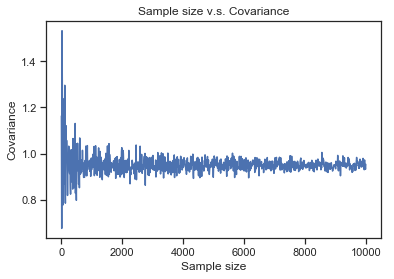

In [16]:
#1. Part c:

#Mean Matrix
mean = [0,0,0]
#Covariance Matrix
cov = [[1,0,0],
       [0,1,0.95],
       [0,0.95,1]]
x_axis = []
result_sample = []
for x in range (1,1000):
    sampleSize = 10 * x
    df = np.random.multivariate_normal(mean, cov, sampleSize)
    x_axis.append(sampleSize)
    result_cov = np.cov(df, rowvar = False)
    result_sample.append(result_cov[1][2])
plt.plot(x_axis,result_sample)
plt.title("Sample size v.s. Covariance")
plt.xlabel("Sample size")
plt.ylabel("Covariance")

As the sample size increase, the emprical covariance converge to the true convariance (0.95).

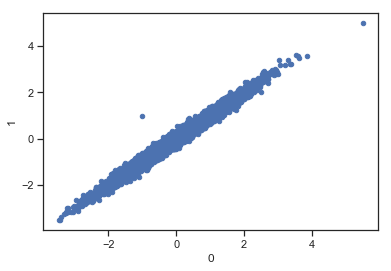

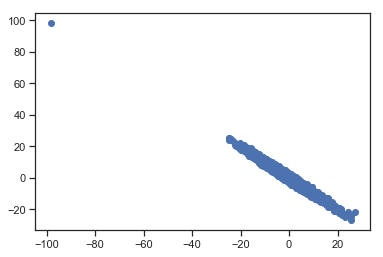

In [10]:
#2.
df2 = pd.read_csv("DF2", index_col='Unnamed: 0')
df2.plot.scatter(x='0',y='1')
plt.show()
y=df2.T.values
matrix = np.cov(y)
inverse = np.linalg.inv(matrix)
x=np.dot(inverse, y)
plt.scatter(x[0],x[1])

In [6]:
#3. 
# beta values
beta_0 = -3
beta_1 = 0
beta = [beta_0, beta_1]
#error array
err = []

#population size
n = 150

1. use normal equations to find $ \hat \beta $


$ \hat \beta = (X_{i}^{T}X_{i})^{-1} X_{i}^{T}y$
2. for each iteration
    * create data (random sample from n = 150), compute beta_hat, record standard error


3. find the standard deviation of the standard error at the end. Compare to -0.15 and argue about the significance of this value

In [7]:
for _ in range(100):
    x = np.random.randn(n,)
    e = np.random.randn(n,)
    y = beta_0 + beta_1*x + e
    x_n = np.transpose(np.stack((np.ones(len(x),), x), axis=0))
    beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(x_n.T,x_n)),x_n.T),y)
    err.extend(abs(beta-beta_hat))
    
std = np.std(np.array(err))

print("Empirical standard deviation of the error: " + str(std))
print("Mean: " + str(np.mean(np.array(err))))

Empirical standard deviation of the error: 0.0488154343568
Mean: 0.0626130689345


The value of -0.15 is insignificant because it is more than 2 standard deviations away from the mean.
Repeating the experiment for different values of n. Plot these values, and on the same plot, plot $ \frac{1}{\sqrt{n}} $. How is the fit?

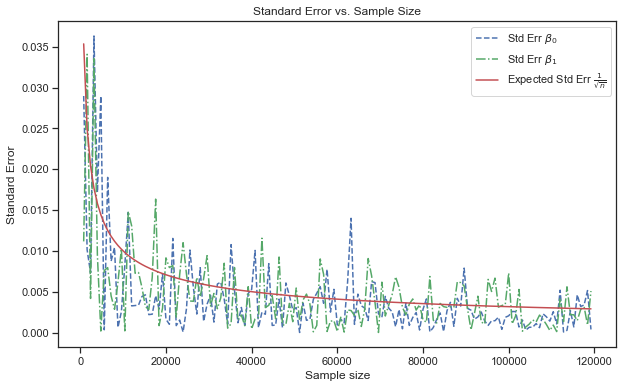

In [8]:
sizes = 800*np.arange(1,150)

err_beta0 = []
err_beta1 = []

for size in sizes:
    x = np.random.randn(size,)
    e = np.random.randn(size,)
    y = beta_0 + beta_1*x + e
    x_n = np.transpose(np.stack((np.ones(len(x),), x), axis=0))
    beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(x_n.T,x_n)),x_n.T),y)
    err_beta0.append(abs(beta[0]-beta_hat[0]))
    err_beta1.append(abs(beta[1]-beta_hat[1]))

fig = plt.figure(figsize=(10,6))
plt.title("Standard Error vs. Sample Size")
plt.xlabel("Sample size")
plt.ylabel("Standard Error")
plt.plot(sizes,err_beta0, 'b--', label=r'Std Err $ \beta_0 $')
plt.plot(sizes,err_beta1, 'g-.', label=r'Std Err $ \beta_1 $')
plt.plot(sizes,1/np.sqrt(sizes), 'r', label=r'Expected Std Err $ \frac{1}{\sqrt{n}} $')
plt.legend()
plt.show()

In [74]:
#4.

# Gets input and file path
year = input("Enter the year from 1880 to 2015: ")
k = input("Enter the top k name you are looking for: ")
file_path = "Names/" + "yob" + str(year) + ".txt"
counter = 0
dataset = []

filedata = open(file_path,"r")

for line in filedata:
    d = line.strip().split(",")
    dataset.append(d)
sorted_list = sorted(dataset, key=lambda x: float(x[2]), reverse = True)
for i in range (0,k):
    print(sorted_list[i])
    
# Gets the frequency for men and women of the name "Name(Input)"
name = input("Enter a name: ")


Enter the year from 1880 to 2015: 2008
Enter the top k name you are looking for: 10
['Jacob', 'M', '22574']
['Michael', 'M', '20601']
['Ethan', 'M', '20198']
['Joshua', 'M', '19188']
['Daniel', 'M', '18993']
['Emma', 'F', '18803']
['Alexander', 'M', '18685']
['Isabella', 'F', '18607']
['William', 'M', '18383']
['Anthony', 'M', '18382']


In [116]:
# Gets the frequency for men and women of the name "Name(Input)"
name = raw_input("Enter a name: ")
men_count = 0
women_count = 0

for year in range (1880,2016):
    file_path = "Names/" + "yob" + str(year) + ".txt"
    filedata = open(file_path,"r")
    for line in filedata:
        d = line.strip().split(",")
        if(d[0] == name and d[1] == 'M'):
            men_count += int(d[2])
        if(d[0] == name and d[1] == 'F'):
            women_count += int(d[2])
print("The name " + name + " appeared %s" %men_count + " times for men and %s" %women_count 
      + " times for women from 1880 to 2015.")

Enter a name: Jacob
The name Jacob appeared 891432 times for men and 2211 times for women from 1880 to 2015.


In [1]:
# Gets the relative frequency for the name "Name(Input) in year XXXX"
name = raw_input("Enter a name: ")
year = input("Enter the year from 1880 to 2015: ")
totalNamesFreq = 0;
nameFreq = 0;

file_path = "Names/" + "yob" + str(year) + ".txt"
filedata = open(file_path,"r")
for line in filedata:
    d = line.strip().split(",")
    totalNamesFreq += int(d[2])
    if(d[0] == name):
        nameFreq += int(d[2])
        
relativeFreq = float(nameFreq)/float(totalNamesFreq)
print("The relative frequency of the name " + name + "is %s" %relativeFreq + " in year %s" %year)

Enter a name: Jacob
Enter the year from 1880 to 2015: 1999
The relative frequency of the name Jacobis 0.00959132904199 in year 1999


In [13]:
# Gets the names that were popular for one gender, then became popular for another gender
# Algorithm: 1. Obtain all the common names for men and women throughout the year range
#            2. Check with gender is more popular at the begnning years
#            3. Loop through all the years for each name, check if the popularity change on that year,
#               if so, add to the final array
# Due to large amount of data, the code takes too long to compile. Comment out in case of accidently compile

'''
men_list = []
women_list = []
common_array = []
result = []
m_freq = 0
f_freq = 0

for year in range (1880,2016):
    file_path = "Names/" + "yob" + str(year) + ".txt"
    filedata = open(file_path,"r")
    for line in filedata:
        d = line.strip().split(",")
        if(d[1] == 'M' and d[0] not in men_list):
            men_list.append(d[0])
        if(d[1] == 'F' and d[0] not in women_list):
            women_list.append(d[0])
common_list = list(set(men_list).intersection(women_list))


for year in range (1880,2016):
    file_path = "Names/" + "yob" + str(year) + ".txt"
    filedata = open(file_path,"r")
    for line in filedata:
        d = line.strip().split(",")
        if (d[0] in common_list):
            index = common_list.index(d[0])
            if(d[1] == 'M'):
                m_freq += int(d[2])
            if(d[1] == 'F'):
                f_freq += int(d[2])
            if(m_freq > f_freq):
                common_list[index] = common_list[index] + ',M'
               
            if(m_freq < f_freq):
                common_list[index] = common_list[index] + ',F'
                                
for line in common_list:
    d = line.strip().split(",")
    for year in range (1880,2016):
        file_path = "Names/" + "yob" + str(year) + ".txt"
        filedata = open(file_path,"r")
        for txt_line in filedata:
            txt_data = txt_line.strip().split(",")
            if(txt_data[0] == d[0] and txt_data[1] == 'M' and d[0] not in result):
                m_freq += int(txt_data[2])
            if(txt_data[0] == d[0] and txt_data[1] == 'F' and d[0] not in result):
                f_freq += int(txt_data[2])
            if(m_freq > f_freq and d[1] == 'F' and d[0] not in result):
                result.append(d[0])
            if(m_freq < f_freq and d[1] == 'M' and d[0] not in result):
                result.append(d[0])


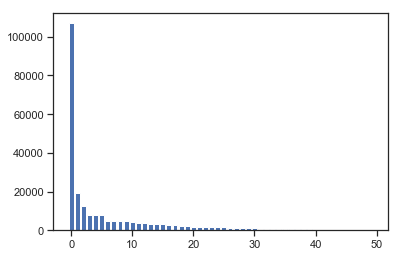

AL    106990
OR     19503
RI     12723
TX      7930
ND      7914
WA      7703
VA      4992
PA      4778
CA      4633
UT      4549
NE      4261
WI      3690
LA      3655
MI      3352
NY      3255
IN      3127
MA      2939
SC      2505
ME      2024
OH      2020
TN      1956
NC      1920
NJ      1811
OK      1780
IL      1771
MO      1689
AR      1438
NV      1131
HI      1058
CO      1012
IA       970
FL       875
KY       741
AZ       715
KS       707
WV       641
GA       637
DE       510
NH       493
ID       492
VT       404
MD       374
NM       352
MS       282
MN       251
MT       244
SD       237
CT       183
WY       173
AK        90
Name: state, dtype: int64


In [27]:
#5.
# Part 1 is just following instructions on Dataquest

#Part 2. We first generate a state column by using apply method,
#        states will contain the location where the tweet it mentioned.
#        To obtain geographical location, we make everything lowercase, 
#        then check which state that tweet is located.
#        Lastly, we just use value_count methods to count up how many tweets were in each states.

tweets = pd.read_csv("tweets.csv")

def get_states(row):
    states = []
    text = str(row["user_location"]).lower()
    if "alabama" in text or "al" in text:
        states = "AL"
    if "alaska" in text or "ak" in text:
        states = "AK"
    if "arizona" in text or "az" in text:
        states = "AZ"
    if "arkansas" in text or "ar" in text:
        states = "AR"
    if "california" in text or "ca" in text:
        states = "CA"
    if "colorado" in text or "co" in text:
        states = "CO"
    if "connecticut" in text or "ct" in text:
        states = "CT"
    if "delaware" in text or "de" in text:
        states = "DE"
    if "florida" in text or "fl" in text:
        states = "FL"
    if "georgia" in text or "ga" in text:
        states = "GA"
    if "hawaii" in text or "hi" in text:
        states = "HI"
    if "idaho" in text or "id" in text:
        states = "ID"
    if "illinois" in text or "il" in text:
        states = "IL"
    if "indiana" in text or "in" in text:
        states = "IN"
    if "iowa" in text or "ia" in text:
        states = "IA"
    if "kansas" in text or "ks" in text:
        states = "KS"
    if "kentucky" in text or "ky" in text:
        states = "KY"
    if "louisiana" in text or "la" in text:
        states = "LA"
    if "maine" in text or "me" in text:
        states = "ME"
    if "alaska" in text or "md" in text:
        states = "MD"
    if "massachusetts" in text or "ma" in text:
        states = "MA"
    if "michigan" in text or "mi" in text:
        states = "MI"
    if "minnesota" in text or "mn" in text:
        states = "MN"
    if "mississipi" in text or "ms" in text:
        states = "MS"
    if "missouri" in text or "mo" in text:
        states = "MO"
    if "montana" in text or "mt" in text:
        states = "MT"
    if "nebraska" in text or "ne" in text:
        states = "NE"
    if "nevada" in text or "nv" in text:
        states = "NV"
    if "new hampshire" in text or "nh" in text:
        states = "NH"
    if "new jersey" in text or "nj" in text:
        states = "NJ"
    if "new mexico" in text or "nm" in text:
        states = "NM"
    if "new york" in text or "ny" in text:
        states = "NY"
    if "north carolina" in text or "nc" in text:
        states = "NC"
    if "north dakota" in text or "nd" in text:
        states = "ND"
    if "ohio" in text or "oh" in text:
        states = "OH"
    if "oklahoma" in text or "ok" in text:
        states = "OK"
    if "oregon" in text or "or" in text:
        states = "OR"
    if "pennsylvania" in text or "pa" in text:
        states = "PA"
    if "rhode island" in text or "ri" in text:
        states = "RI"
    if "south carolina" in text or "sc" in text:
        states = "SC"
    if "south dakota" in text or "sd" in text:
        states = "SD"
    if "tennessee" in text or "tn" in text:
        states = "TN"
    if "texas" in text or "tx" in text:
        states = "TX"
    if "utah" in text or "ut" in text:
        states = "UT"
    if "vermont" in text or "vt" in text:
        states = "VT"
    if "virginia" in text or "va" in text:
        states = "VA"
    if "washington" in text or "wa" in text:
        states = "WA"
    if "west virginia" in text or "wv" in text:
        states = "WV"
    if "wisconsin" in text or "wi" in text:
        states = "WI"
    if "wyoming" in text or "wy" in text:
        states = "WY"       
    return "".join(states)

tweets["state"] = tweets.apply(get_states,axis=1)

counts = tweets["state"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)